# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [8]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 5, in <module>
    from gdown.__main__ import main
  File "/usr/local/lib/python3.10/dist-packages/gdown/__init__.py", line 4, in <module>
    from .cached_download import cached_download
  File "/usr/local/lib/python3.10/dist-packages/gdown/cached_download.py", line 12, in <module>
    from .download import download
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 14, in <module>
    import tqdm
  File "/usr/local/lib/python3.10/dist-packages/tqdm/__init__.py", line 1, in <module>
    from ._monitor import TMonitor, TqdmSynchronisationWarning
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 674, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 577, in module_from_spec
  File "<frozen importlib._bootstrap>", line 556, in _init_module_attr

## Import Libraries

In [2]:
import tensorflow as tf
from keras import layers, models, datasets
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [3]:
#!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   32G   47G  41% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1       106G   87G   19G  83% /opt/bin/.nvidia
tmpfs           6.4G   48K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [4]:
#!7z x /content/Traffic_Signs.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 244267687 bytes (233 MiB)

Extracting archive: /content/Traffic_Signs.zip
 10% 4096 Open              --
Path = /content/Traffic_Signs.zip
Type = zip
Physical Size = 244267687

  0%    
Would you like to replace the existing file:
  Path:     ./Traffic_Signs/Dataset_MetaData.csv
  Size:     2019314 bytes (1972 KiB)
  Modified: 2024-08-17 20:56:15
with the file from archive:
  Path:     Traffic_Signs/Dataset_MetaData.csv
  Size:     2019314 bytes (1972 KiB)
  Modified: 2024-08-17 20:56:15
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? 

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [10]:
image_size = (64, 64)
batch_size = 32
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/Traffic_Signs/Dataset",
    validation_split=0.15,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = keras.utils.image_dataset_from_directory(
    "/content/Traffic_Signs/Dataset",
    validation_split=0.15,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 39209 files belonging to 43 classes.
Using 33328 files for training.
Using 5881 files for validation.
Found 39209 files belonging to 43 classes.
Using 33328 files for training.
Using 5881 files for validation.


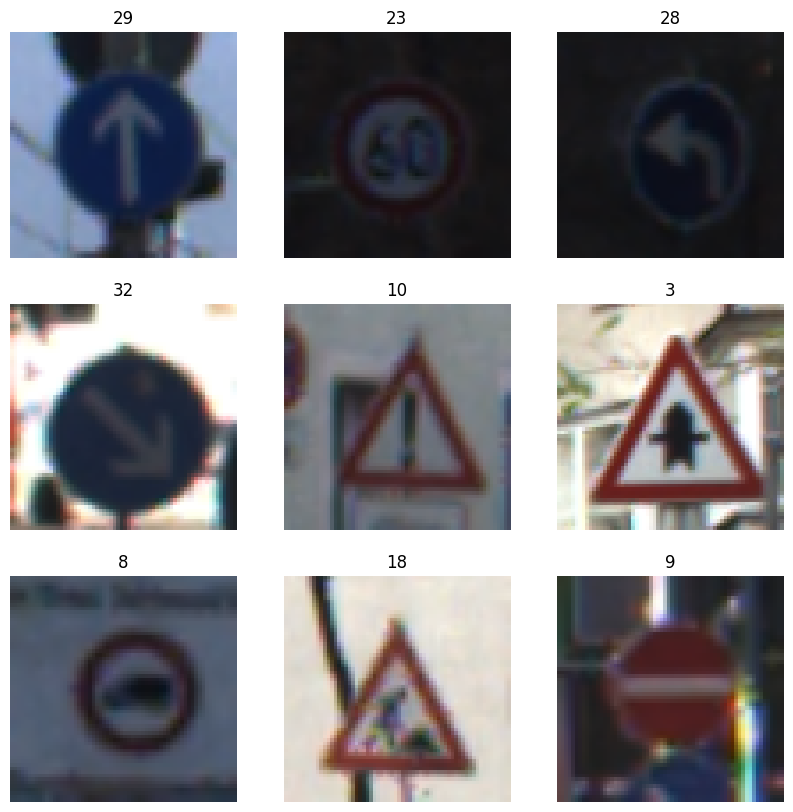

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [44]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomBrightness(factor=0.2),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

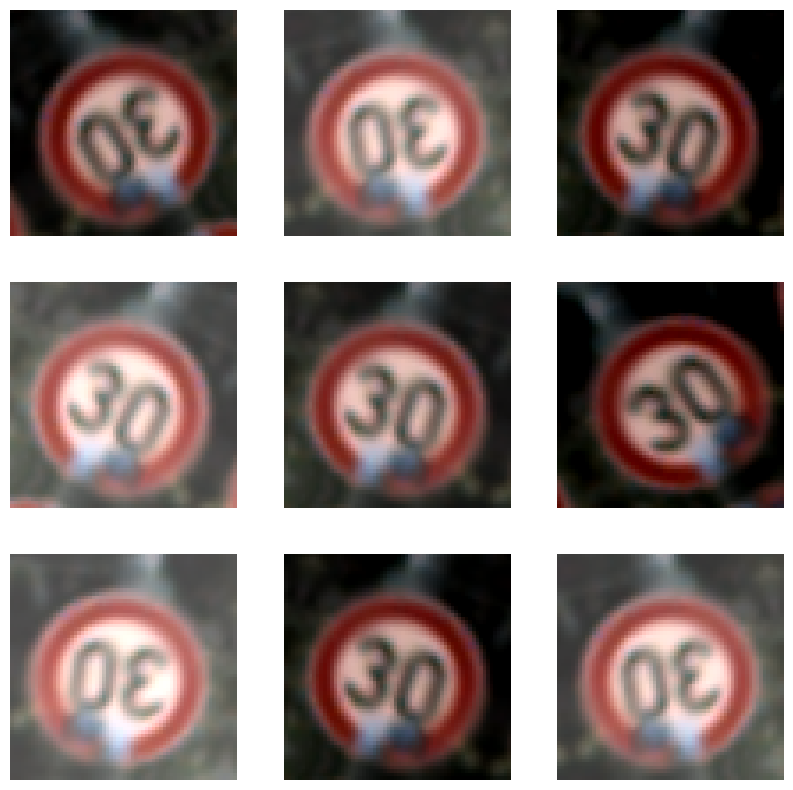

In [45]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [65]:
model = keras.Sequential([
    layers.Input(shape=(image_size[0], image_size[1], 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(filters=32, kernel_size=3, padding='same'),
    layers.Conv2D(filters=32, kernel_size=3, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0,1),

    layers.Flatten(),

    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=16, activation='relu'),
    # Output
     layers.Dense(units=43, activation='softmax'),
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       1,048,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 43)                  │             731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,117,547 (4.26 MB)

 Trainable params: 1,117,547 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [77]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
]

In [78]:
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))


In [79]:
history = model.fit(
    augmented_train_ds,
    epochs=3,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/3
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 33s 31ms/step - accuracy: 0.8561 - loss: 0.4777 - val_accuracy: 0.9075 - val_loss: 0.3012
Epoch 2/3
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.8674 - loss: 0.4366 - val_accuracy: 0.9111 - val_loss: 0.2975
Epoch 3/3
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.8774 - loss: 0.4090 - val_accuracy: 0.9259 - val_loss: 0.2461


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [80]:
# Assuming 'test_ds' is a list of datasets, extract the actual test dataset
actual_test_ds = test_ds[0]  # Replace 0 with the correct index if necessary

# Evaluate the model using the actual test dataset
model.evaluate(actual_test_ds)

1042/1042 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9377 - loss: 0.2003


[0.19396767020225525, 0.939660370349884]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [24]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: Test_Dataset/Dataset/11536.png  
  inflating: Test_Dataset/Dataset/02781.png  
  inflating: Test_Dataset/Dataset/00009.png  
 extracting: Test_Dataset/Dataset/10350.png  
 extracting: Test_Dataset/Dataset/11484.png  
 extracting: Test_Dataset/Dataset/01252.png  
 extracting: Test_Dataset/Dataset/10960.png  
 extracting: Test_Dataset/Dataset/02931.png  
 extracting: Test_Dataset/Dataset/00390.png  
 extracting: Test_Dataset/Dataset/07851.png  
 extracting: Test_Dataset/Dataset/06914.png  
 extracting: Test_Dataset/Dataset/01474.png  
 extracting: Test_Dataset/Dataset/06175.png  
  inflating: Test_Dataset/Dataset/11465.png  
  inflating: Test_Dataset/Dataset/02239.png  
 extracting: Test_Dataset/Dataset/01360.png  
 extracting: Test_Dataset/Dataset/01467.png  
 extracting: Test_Dataset/Dataset/05346.png  
  inflating: Test_Dataset/Dataset/03987.png  
 extracting: Test_Dataset/Dataset/08806.png  
 extracting: Test_Dataset/Dat

In [26]:
image_size = (64, 64)
batch_size = 32
sample_ds = keras.utils.image_dataset_from_directory(
    "/content/Test_Dataset",
    validation_split=0.15,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 12630 files belonging to 1 classes.
Using 10736 files for training.
Using 1894 files for validation.


In [81]:
actual_sample_ds = sample_ds[0]
predictions = model.predict(actual_sample_ds)
predicted_class = tf.argmax(predictions[0])
print(f"Predicted Class: {predicted_class}")

336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted Class: 31


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

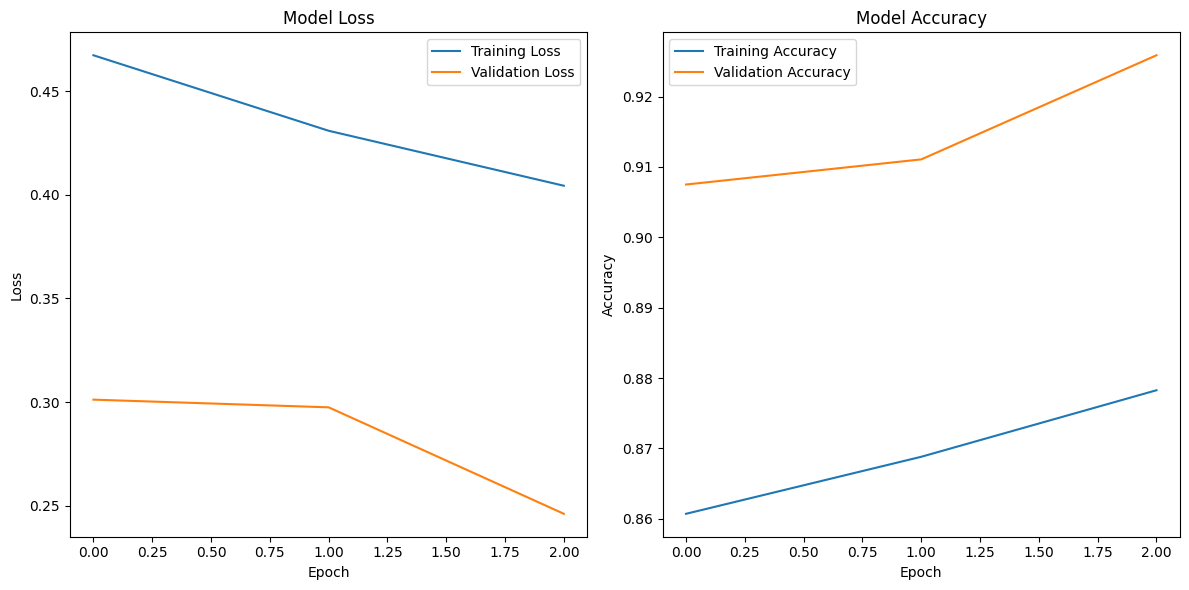

In [82]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [ ]:
model.save('CNN_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
I did a data augmentation to get a better model.

 Input : to specifies the input shape of the images
Rescaling : to normalizes pixel values to the range [0, 1] by dividing by 255
I used Conv2D layer becouse i work on 2d images
to detect basic features like edges or textures
and maxPool layer to decreasing the number of parameters
Dropout Layer : Regularizes the model by randomly dropping 10% of the neurons during training to prevent overfitting.
Flatten Layer: Converts the 2D feature maps into a 1D vector to be fed into the fully connected layers
Dense layers :These layers perform high-level reasoning and classification based on the features extracted by the convolutional layers
The final layer with 43 units (assuming 43 classes) uses the softmax activation function to produce probability distributions over the classes, which is suitable for classification tasks

I choose sparse_categorical_crossentropy loss function to classify multi class classification

From the plot each ephocs the loss is decrese and accuracy is incresed wich good